In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2

In [2]:
# path = 'C:/Users/Raffiudin/Vegetable Images/train/'
# img_dict = dict()
# label = []
# for root, dirs, files in os.walk(path):
#     print(os.path.basename(root))
#     my_key = os.path.basename(root)
#     label.append(my_key)

#     dir_images = []
#     for file_ in files:
#         full_file_path = os.path.join(root, file_)
#         img = cv2.imread(full_file_path)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         dir_images.append(img)

#     img_dict[my_key] = dir_images
# del img_dict['']

# plt.figure(figsize=(10,10)) # specifying the overall grid size

# for i in range(9):
#     plt.subplot(3,3,i+1) 
#     plt.imshow(dir_images[i])
#     plt.xlabel(label[i])

# plt.show()


### Importing DATASETS

In [3]:
# import tensorflow_datasets as tfds
path = 'C:/Users/Raffiudin/Vegetable Images/train/'


train = tf.keras.utils.image_dataset_from_directory(
    path,
    seed=123,
    image_size=(224, 224),
    batch_size=32
)




valid = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/Raffiudin/Vegetable Images/validation',
    seed=123,
    image_size=(224, 224),batch_size=32)

test = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/Raffiudin/Vegetable Images/test',
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


## Data Manipulation Techniques

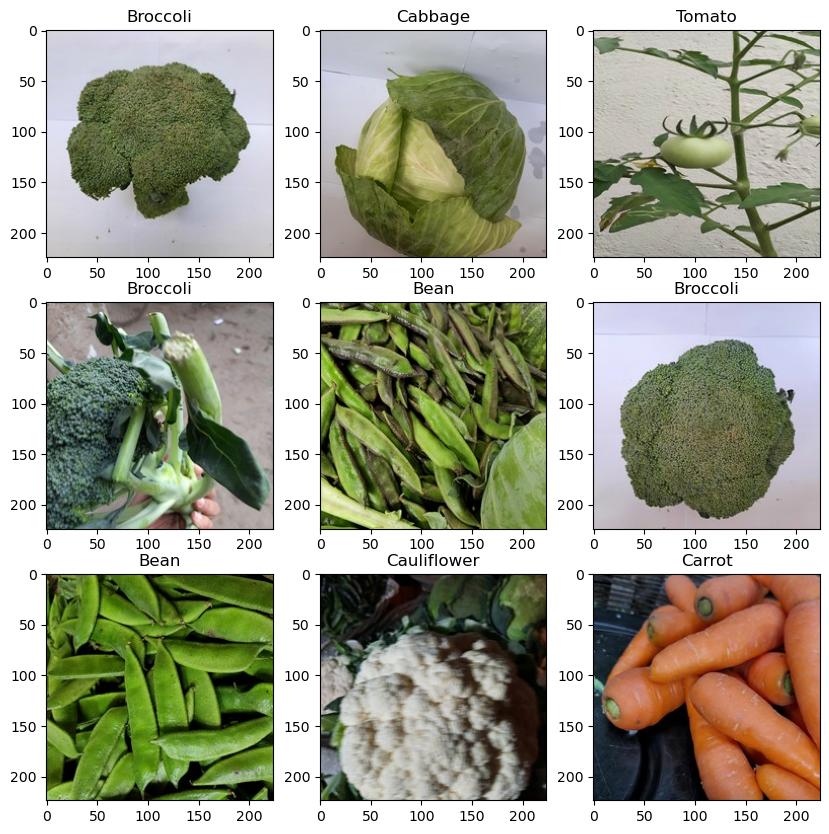

In [4]:
class_names = train.class_names

images1 = []
labels1 = []
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        x = images[i].numpy().astype("uint8")
        images1.append(x)
        plt.imshow(x)
        plt.title(class_names[labels[i]])
        labels1.append(class_names[labels[i]])
        plt.axis("on")
images1 = images1[0:3]
labels1 = labels[0:3]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


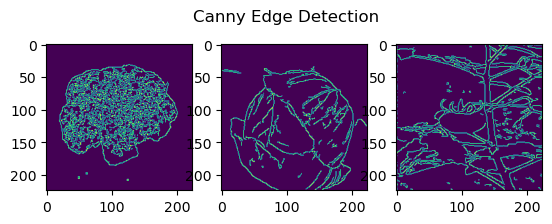

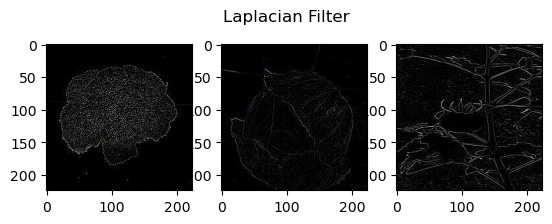

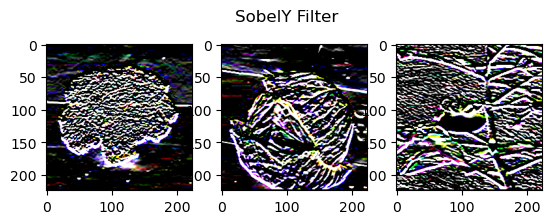

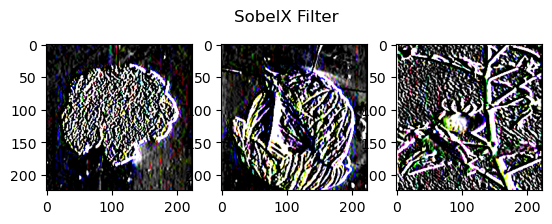

In [5]:
fig = plt.figure()
for j in range(3):
    ax1 = fig.add_subplot(1,3, j + 1)
    edges = cv.Canny(images1[j],100,200)

    ax1.imshow(edges)

fig.suptitle('Canny Edge Detection') # or plt.suptitle('Main title')
fig.subplots_adjust(top=1.4)



fig = plt.figure()
for j in range(3):
    ax1 = fig.add_subplot(1,3, j + 1)
    laplacian = cv.Laplacian(images1[j],cv.CV_16S)
    ax1.imshow(laplacian)

fig.suptitle('Laplacian Filter') # or plt.suptitle('Main title')
fig.subplots_adjust(top=1.4)
fig = plt.figure()
for j in range(3):
    ax1 = fig.add_subplot(1,3, j + 1)
    sobely = cv.Sobel(images1[j],cv.CV_16S,0,1,ksize=5)
    ax1.imshow(sobely)

fig.suptitle('SobelY Filter') # or plt.suptitle('Main title')
fig.subplots_adjust(top=1.4)
fig = plt.figure()
for j in range(3):
    ax1 = fig.add_subplot(1,3, j + 1)
    sobelx = cv.Sobel(images1[j],cv.CV_16S,1,0,ksize=5)
    ax1.imshow(sobelx)

fig.suptitle('SobelX Filter') # or plt.suptitle('Main title')
fig.subplots_adjust(top=1.4)




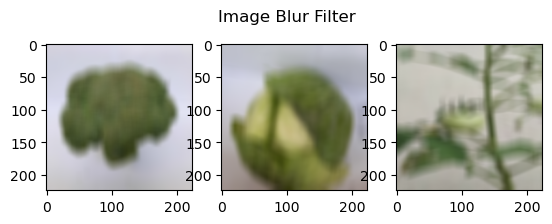

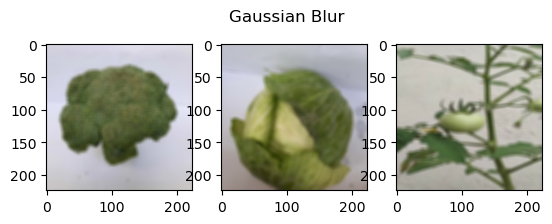

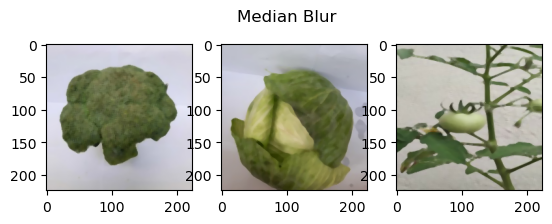

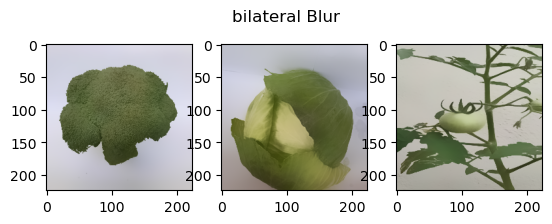

In [6]:

fig = plt.figure()
for j in range(3):
    ax1 = fig.add_subplot(1,3, j + 1)
    edges = cv.blur(images1[j],(10,20))
    ax1.imshow(edges)

fig.suptitle('Image Blur Filter') # or plt.suptitle('Main title')
fig.subplots_adjust(top=1.4)


fig = plt.figure()
for j in range(3):
    ax1 = fig.add_subplot(1,3, j + 1)
    Gaussian=cv2.GaussianBlur(images1[j],(7,7),20)
    ax1.imshow(Gaussian)

fig.suptitle('Gaussian Blur') # or plt.suptitle('Main title')
fig.subplots_adjust(top=1.4)

#cv2.medianBlur
#takes median of all pixels under the kernel area and central element 
#is replaced with this median value.
fig = plt.figure()
for j in range(3):
    ax1 = fig.add_subplot(1,3, j + 1)
    median=cv2.medianBlur(images1[j],5)
    ax1.imshow(median)

fig.suptitle('Median Blur') # or plt.suptitle('Main title')
fig.subplots_adjust(top=1.4)
#cv2.bilateralFilter
#Bilateral is very effective in noise removal while keeping the edges sharp
fig = plt.figure()
for j in range(3):
    ax1 = fig.add_subplot(1,3, j + 1)
    bilateral=cv2.bilateralFilter(images1[j],30,75,75)
    ax1.imshow(bilateral)

fig.suptitle('bilateral Blur') # or plt.suptitle('Main title')
fig.subplots_adjust(top=1.4)




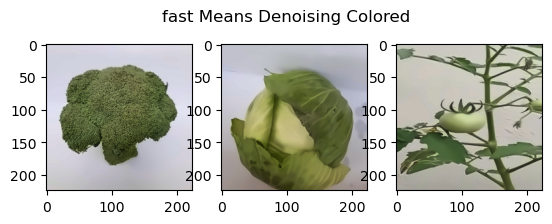

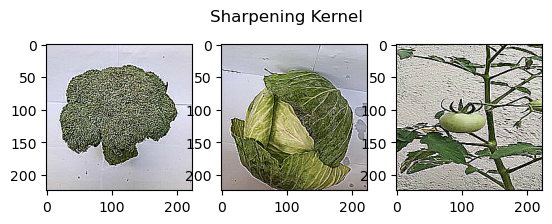

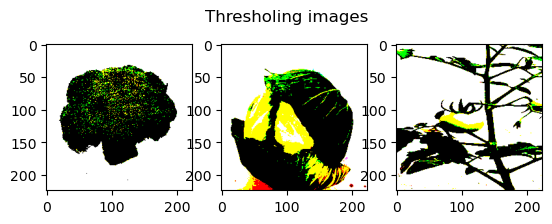

In [7]:

fig = plt.figure()
for j in range(3):
    ax1 = fig.add_subplot(1,3, j + 1)
    dst=cv2.fastNlMeansDenoisingColored(images1[j],None,6,6,7,21)
    ax1.imshow(dst)

fig.suptitle('fast Means Denoising Colored') # or plt.suptitle('Main title')
fig.subplots_adjust(top=1.4)

kernel_sharpening=np.array([[-1,-1,-1],[-1, 9,-1],[-1,-1,-1]])
fig = plt.figure()
for j in range(3):
    ax1 = fig.add_subplot(1,3, j + 1)
    sharpened=cv2.filter2D(images1[j],-1,kernel_sharpening)
    ax1.imshow(sharpened)

fig.suptitle('Sharpening Kernel') # or plt.suptitle('Main title')
fig.subplots_adjust(top=1.4)
fig = plt.figure()
for j in range(3):
    ax1 = fig.add_subplot(1,3, j + 1)
    _,thresh1=cv2.threshold(images1[j],127,255,cv2.THRESH_BINARY)
    ax1.imshow(thresh1)

fig.suptitle('Thresholing images') # or plt.suptitle('Main title')
fig.subplots_adjust(top=1.4)



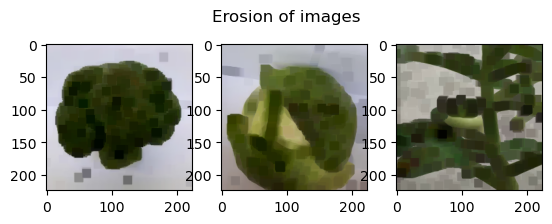

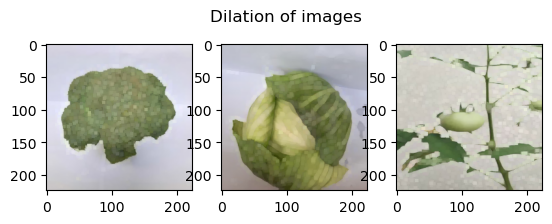

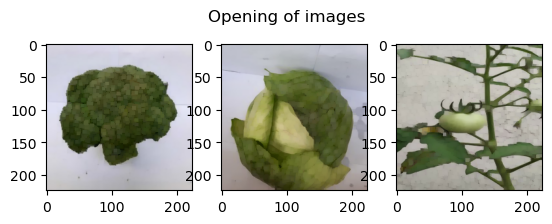

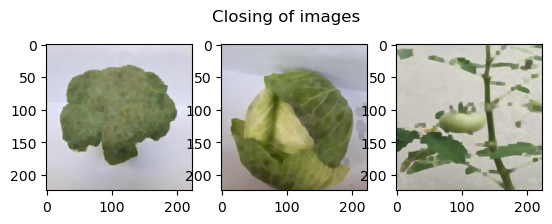

In [8]:
kernel=np.ones((5,5),np.uint8)
fig = plt.figure()
for j in range(3):
    ax1 = fig.add_subplot(1,3, j + 1)
    erosion=cv2.erode(images1[j],kernel,iterations=3)
    ax1.imshow(erosion)

fig.suptitle('Erosion of images')
fig.subplots_adjust(top=1.4)

fig = plt.figure()
for j in range(3):
    ax1 = fig.add_subplot(1,3, j + 1)
    dilation=cv2.dilate(images1[j],kernel,iterations=1)
    ax1.imshow(dilation)

fig.suptitle('Dilation of images')
fig.subplots_adjust(top=1.4)


fig = plt.figure()
for j in range(3):
    ax1 = fig.add_subplot(1,3, j + 1)
    opening = cv2.morphologyEx(images1[j],cv2.MORPH_OPEN,kernel)
    ax1.imshow(opening)

fig.suptitle('Opening of images')
fig.subplots_adjust(top=1.4)


fig = plt.figure()
for j in range(3):
    ax1 = fig.add_subplot(1,3, j + 1)
    closing=cv2.morphologyEx(images1[j],cv2.MORPH_CLOSE,kernel)
    ax1.imshow(closing)

fig.suptitle('Closing of images')
fig.subplots_adjust(top=1.4)

In [9]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


## Convolutional Neural Network

In [10]:
for image_batch, labels_batch in train:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32,)


In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Rescaling(1./255))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), padding='same', data_format='channels_last', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=15, activation='softmax'))

In [12]:
tf.random.set_seed(1)
model.build(input_shape=(32, 224,224,3))
model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.001), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (32, 224, 224, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 112, 112, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 56, 56, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 28, 28, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 14, 14, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 7, 7, 128)           7

In [14]:
epochs = 15

history = model.fit(train, validation_data=valid, epochs=epochs, shuffle=True)

Epoch 1/15
469/469 [==============================] - 118s 247ms/step - loss: 2.1657 - accuracy: 0.2485 - val_loss: 1.6183 - val_accuracy: 0.4653
Epoch 2/15
469/469 [==============================] - 115s 244ms/step - loss: 1.4136 - accuracy: 0.5140 - val_loss: 0.8489 - val_accuracy: 0.7117
Epoch 3/15
469/469 [==============================] - 115s 244ms/step - loss: 0.9925 - accuracy: 0.6735 - val_loss: 0.5338 - val_accuracy: 0.8273
Epoch 4/15
469/469 [==============================] - 115s 245ms/step - loss: 0.7467 - accuracy: 0.7590 - val_loss: 0.4225 - val_accuracy: 0.8663
Epoch 5/15
469/469 [==============================] - 115s 244ms/step - loss: 0.6037 - accuracy: 0.8063 - val_loss: 0.3378 - val_accuracy: 0.8907
Epoch 6/15
469/469 [==============================] - 115s 244ms/step - loss: 0.5068 - accuracy: 0.8393 - val_loss: 0.2911 - val_accuracy: 0.9077
Epoch 7/15
469/469 [==============================] - 114s 243ms/step - loss: 0.4445 - accuracy: 0.8650 - val_loss: 0.2317 -

Text(0.5, 0, 'Epoch')

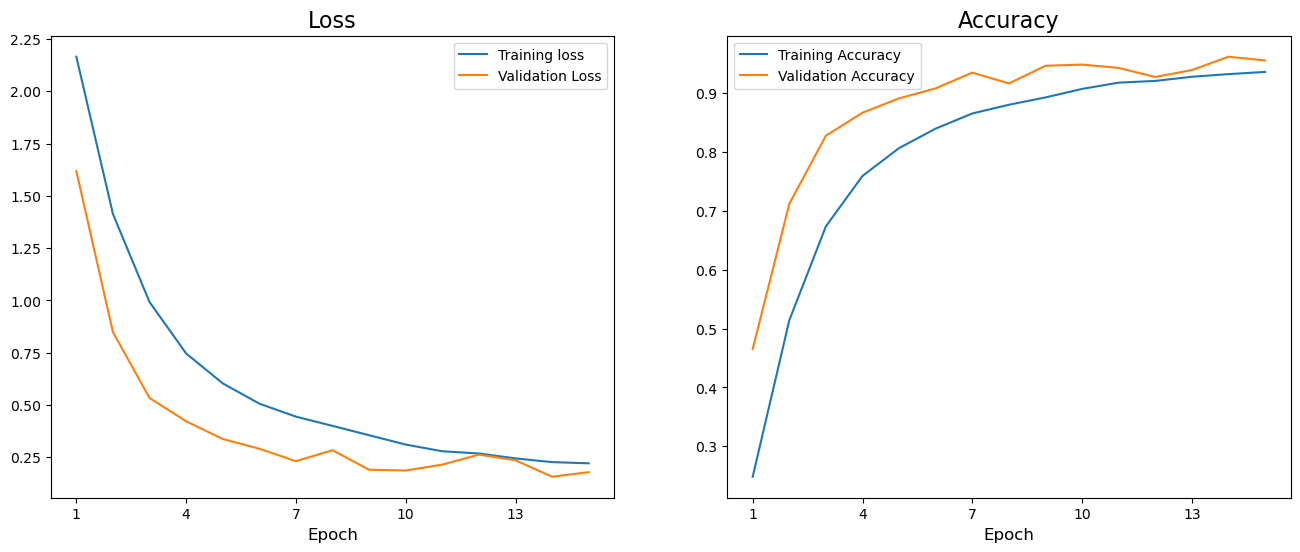

In [17]:
epochs=15

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
title_fontsize = 16
axis_fontsize = 12

ax1.plot(range(1,epochs+1), history.history['loss'], label='Training loss')
ax1.plot(range(1,epochs+1), history.history['val_loss'], label='Validation Loss')
ax1.legend()
ax1.set_xticks(range(1,epochs+1,3))
ax1.set_title('Loss', fontsize=title_fontsize)
ax1.set_xlabel('Epoch', fontsize=axis_fontsize)

ax2.plot(range(1,epochs+1), history.history['accuracy'], label='Training Accuracy')
ax2.plot(range(1,epochs+1), history.history['val_accuracy'], label='Validation Accuracy')
ax2.legend()
ax2.set_xticks(range(1,epochs+1,3))
ax2.set_title('Accuracy', fontsize=title_fontsize)
ax2.set_xlabel('Epoch', fontsize=axis_fontsize)

In [18]:
model.evaluate(test)

94/94 [==============================] - 9s 88ms/step - loss: 0.1662 - accuracy: 0.9577


[0.16616062819957733, 0.9576666951179504]